### AV5

### Mariana Yukari Yano

### 11202230644

Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica. **O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa**. Em uma das simulações, introduza um defeito de massa:  substitua uma massa $m2 (m2=5m)$
 
Parâmetros:

- Massas padrão:  $m=1 kg$

- Constante elástica: $k = 1 N/m$

- Tamanhos da cadeia: $N = 100$, $1000$ e $10.000$

- Defeito: massa igual a $m2 = 5kg$  (apenas em uma das simulações)

**Tarefas**

1. Cálculo das Frequências de Vibração
- Para cada valor de  (100, 1000, 10000), calcule as frequências naturais de vibração do sistema para:

    - Cadeia homogênea (todas as massas iguais)

    - Cadeia com defeito de massa no centro

2. Densidade de Estados

- Construa histogramas (densidade de estados) para os valores de  obtidos em cada caso.

- Compare os histogramas para diferentes tamanhos de cadeia e para a presença/ausência do defeito.

3. Deslocamentos Relativos (Modos Normais)

- Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:

    - Às cinco menores frequências (modos de baixa energia)

    - Às cinco maiores frequências (modos de alta energia)

- Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.

4. Análise e Comparação

- Analise como o tamanho da cadeia e a presença do defeito afetam:
    - A distribuição das frequências (densidade de estados)
    - Os padrões de deslocamento dos modos normais
-  Discuta a localização dos modos associados ao defeito de massa.


Analisando cadeia com N = 100
Tempo cálculo homogêneo: 0.02 s
Tempo cálculo com defeito: 0.00 s


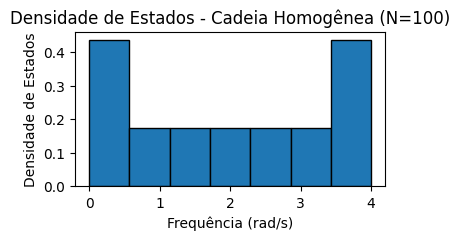

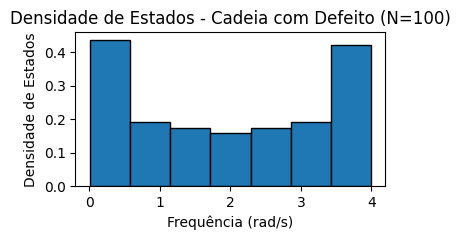

<Figure size 600x400 with 0 Axes>

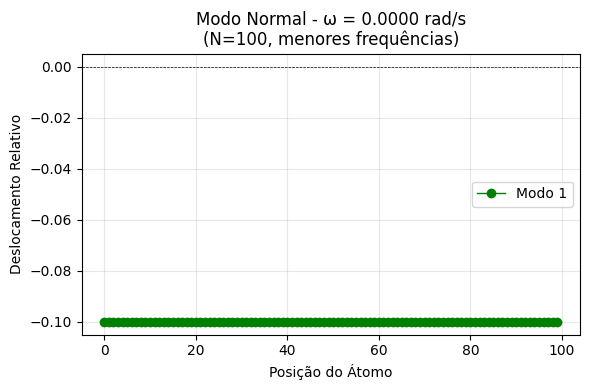

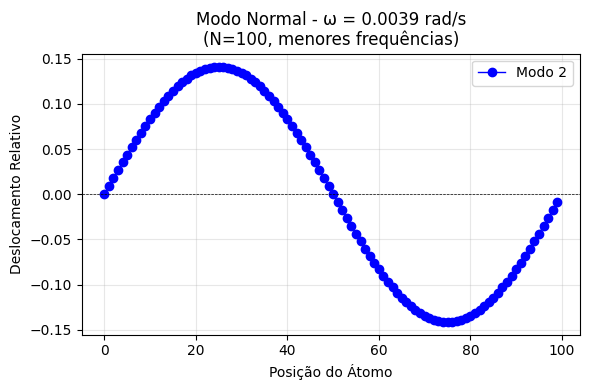

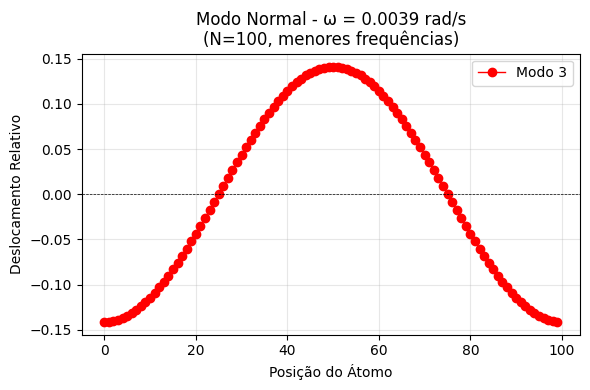

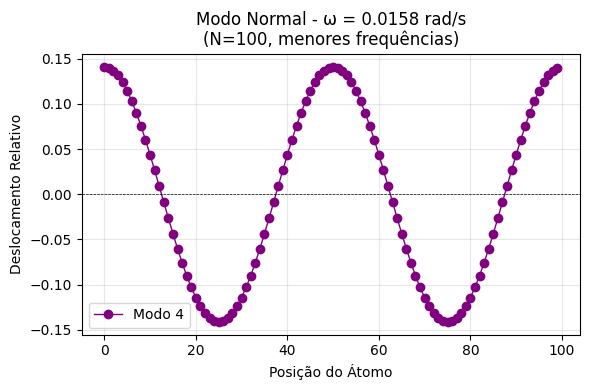

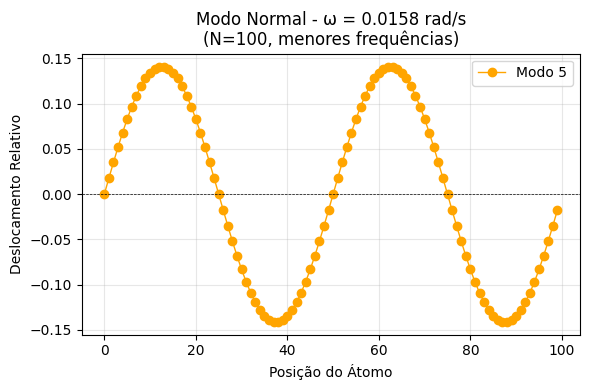

<Figure size 600x400 with 0 Axes>

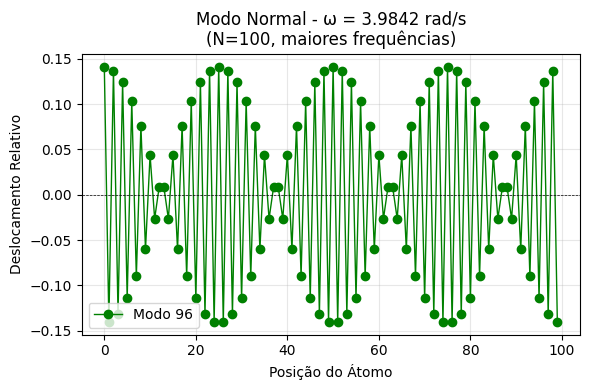

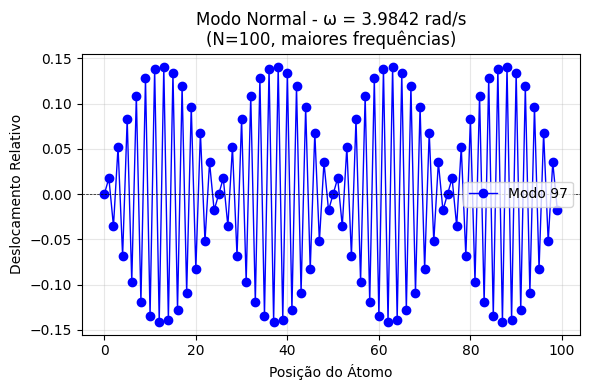

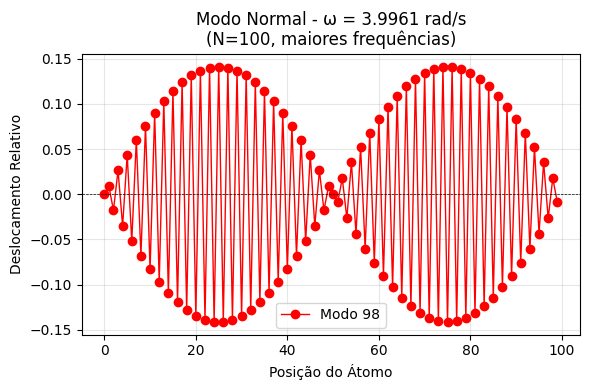

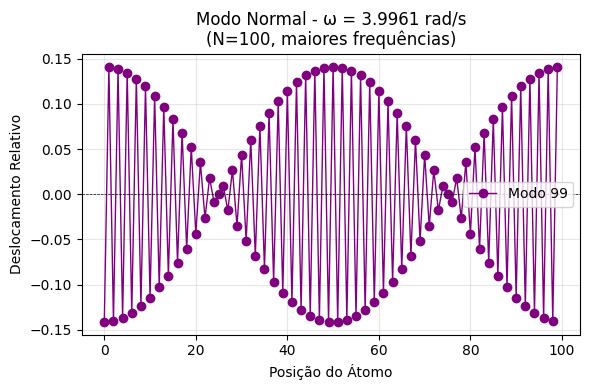

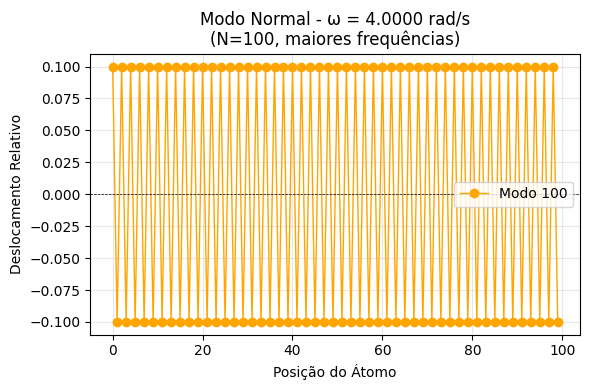

<Figure size 600x400 with 0 Axes>

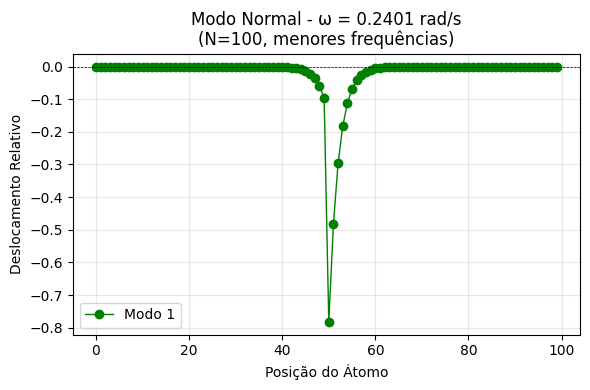

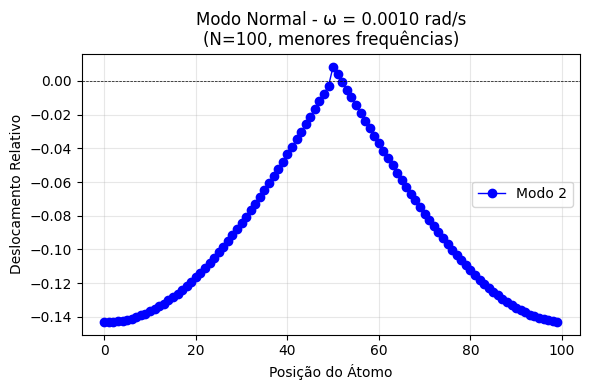

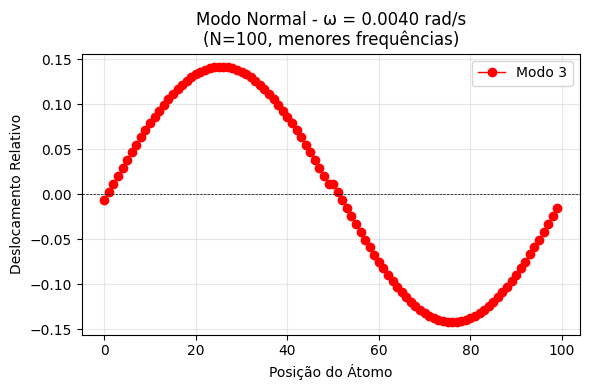

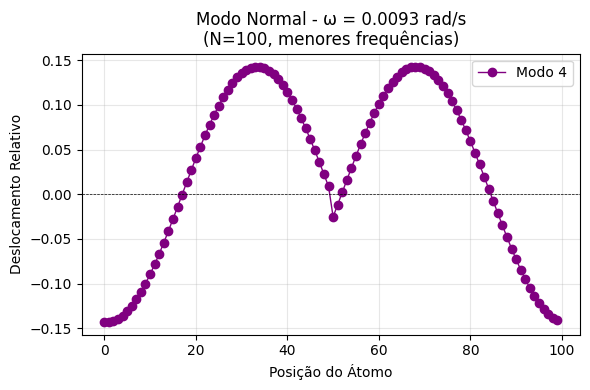

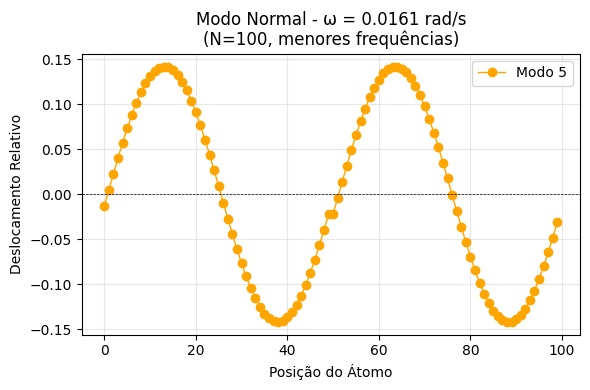

<Figure size 600x400 with 0 Axes>

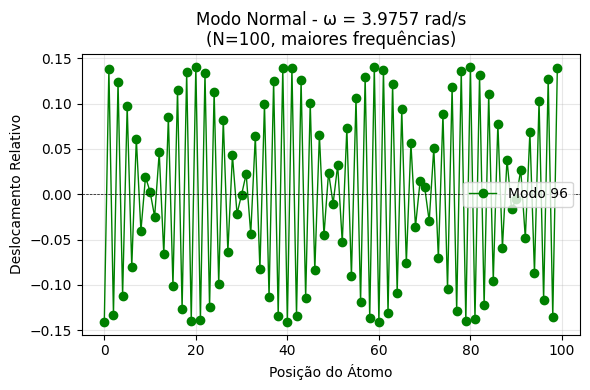

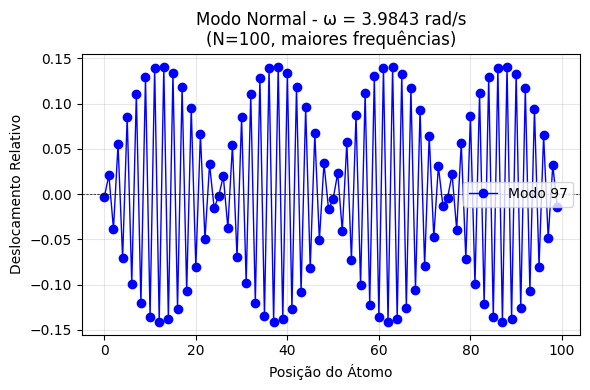

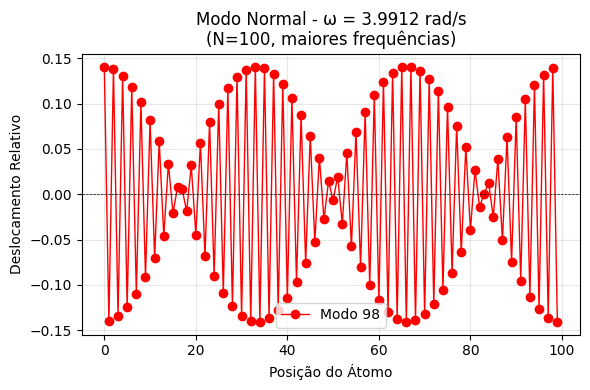

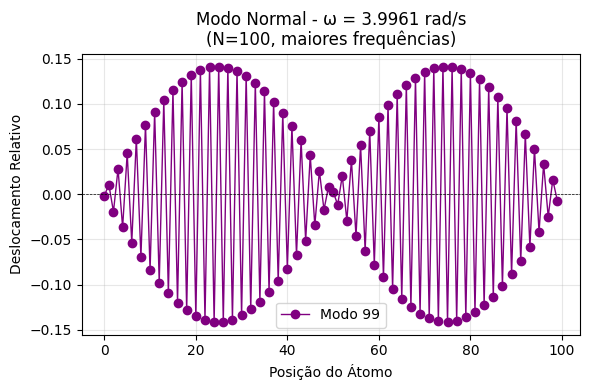

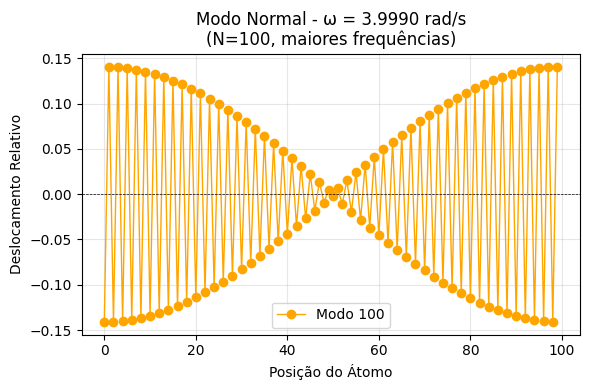

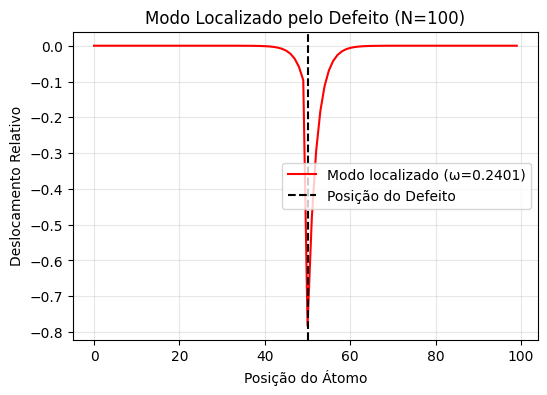


Analisando cadeia com N = 1000
Tempo cálculo homogêneo: 0.54 s
Tempo cálculo com defeito: 0.50 s


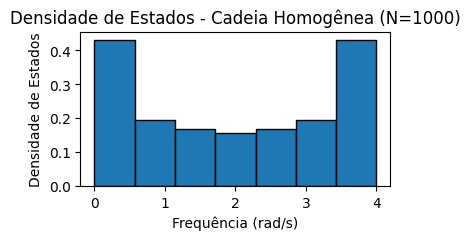

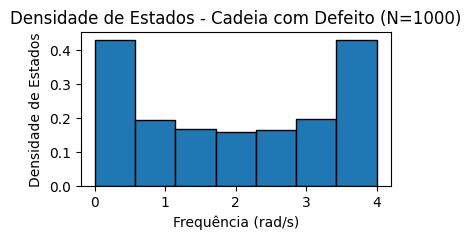

<Figure size 600x400 with 0 Axes>

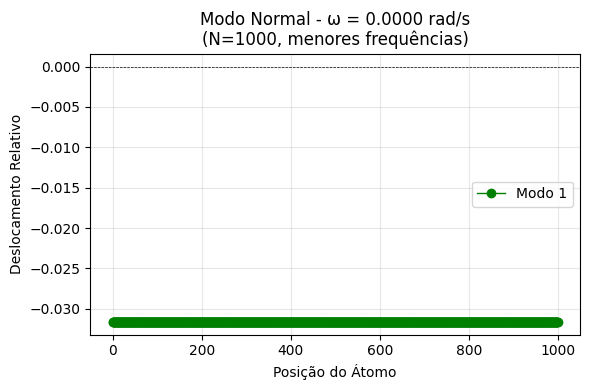

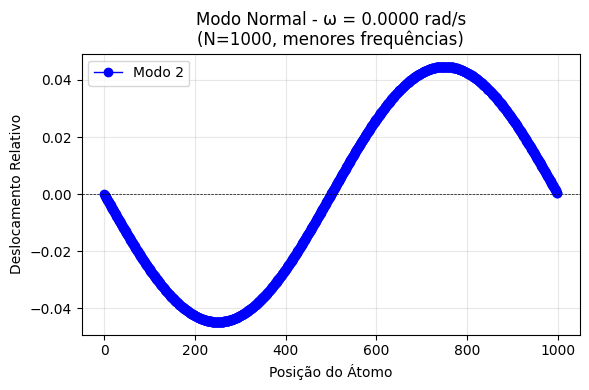

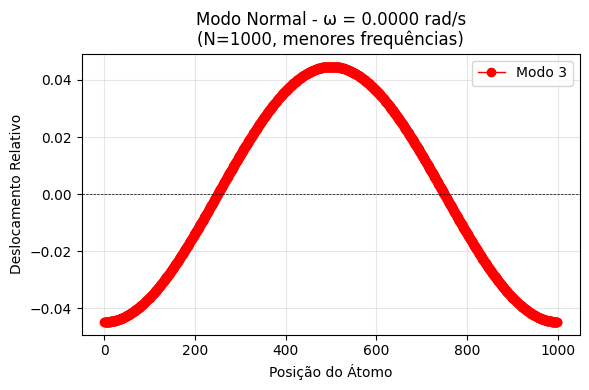

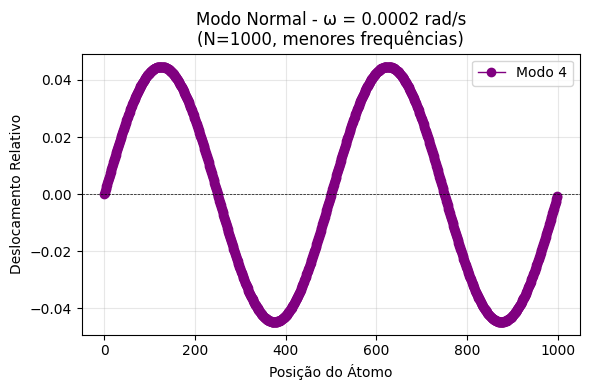

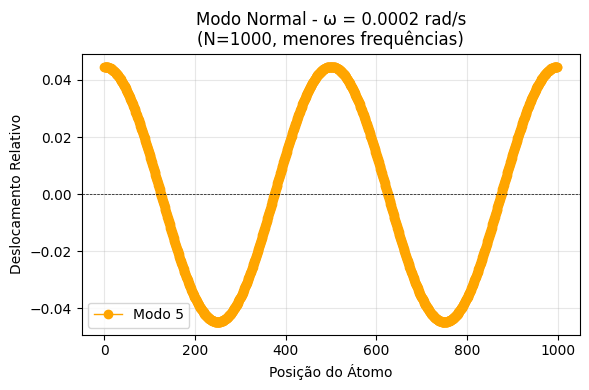

<Figure size 600x400 with 0 Axes>

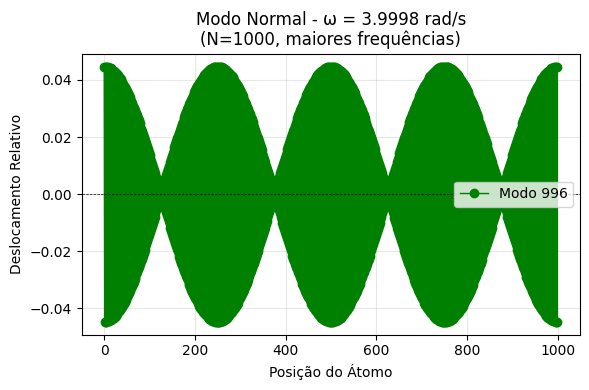

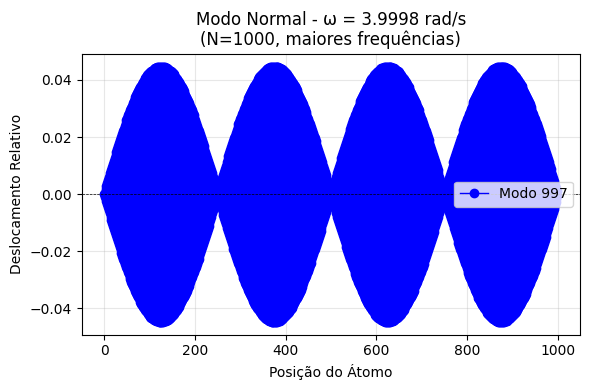

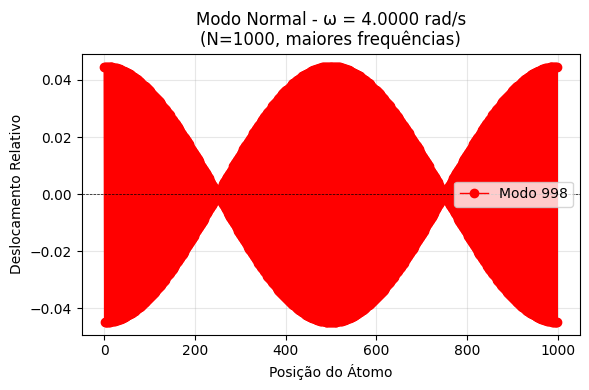

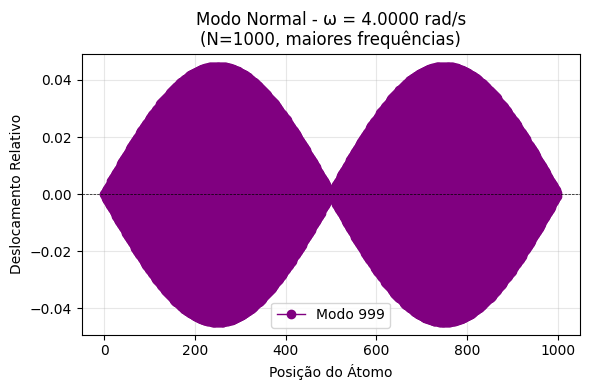

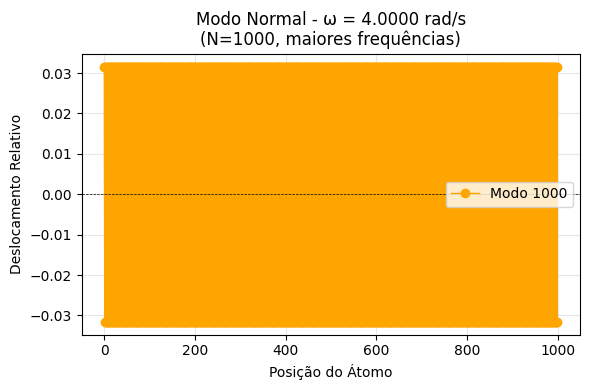

<Figure size 600x400 with 0 Axes>

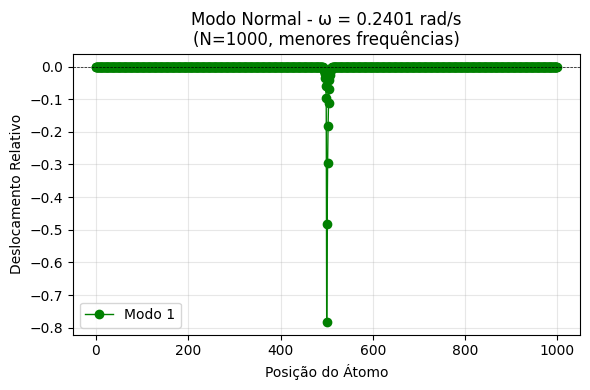

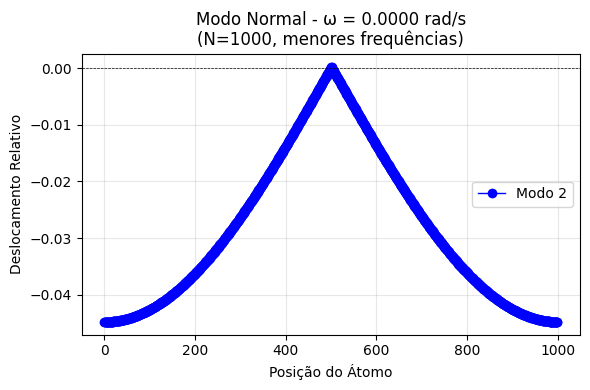

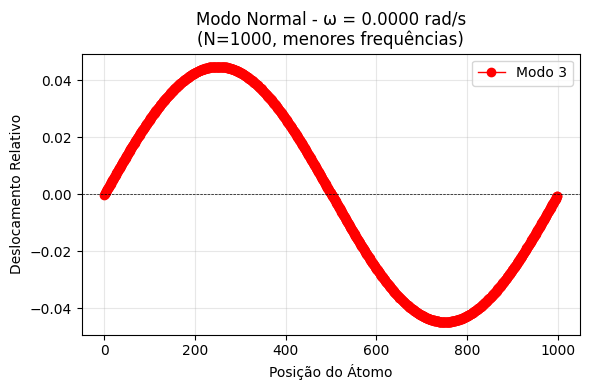

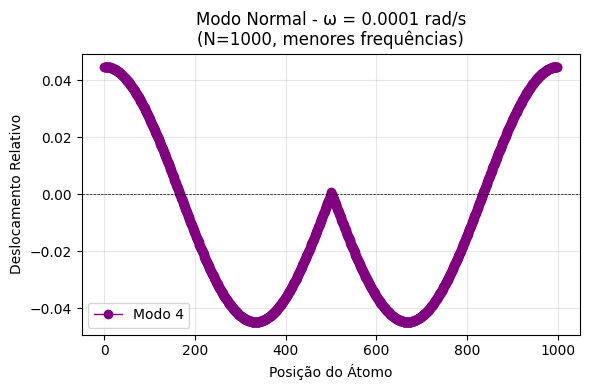

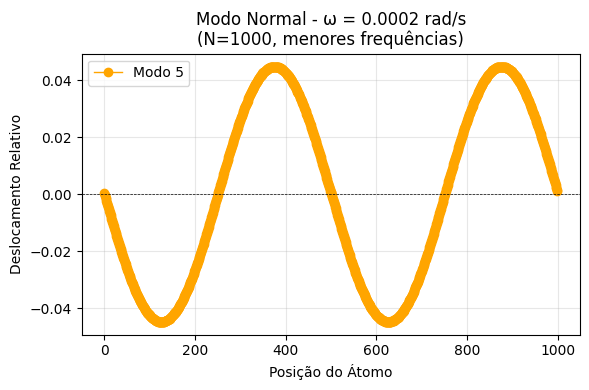

<Figure size 600x400 with 0 Axes>

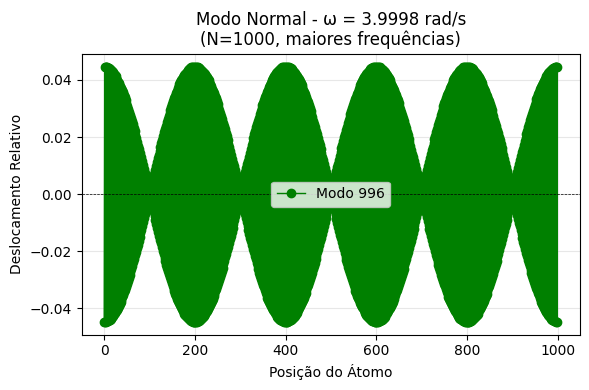

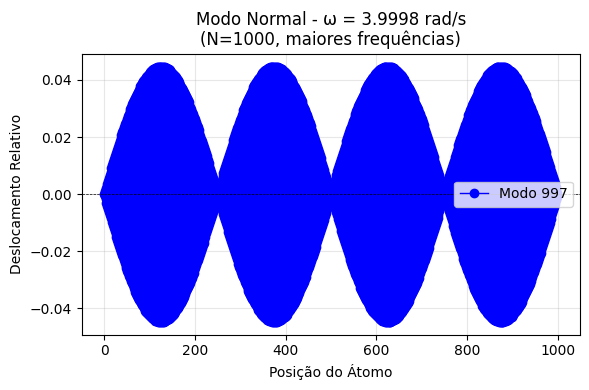

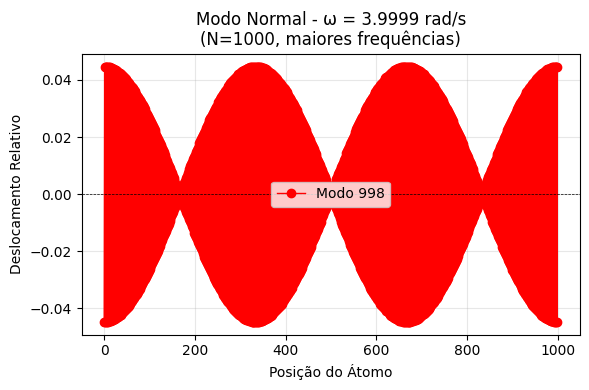

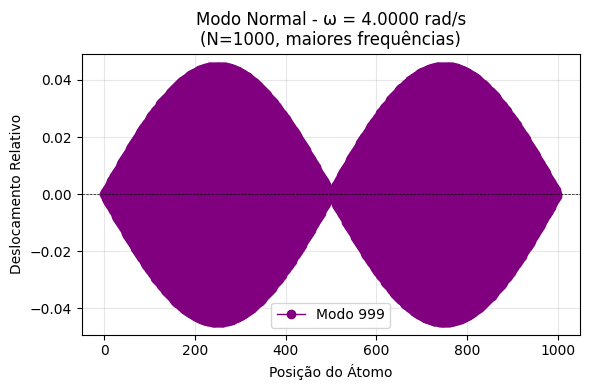

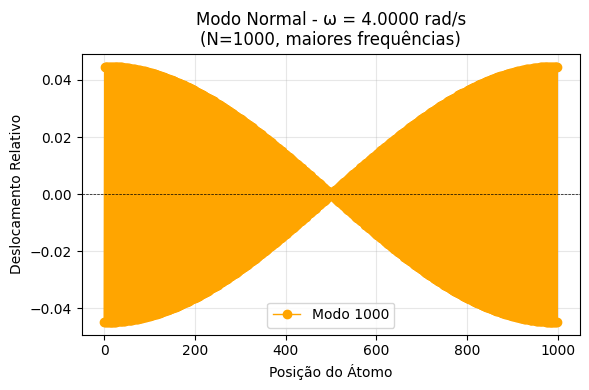

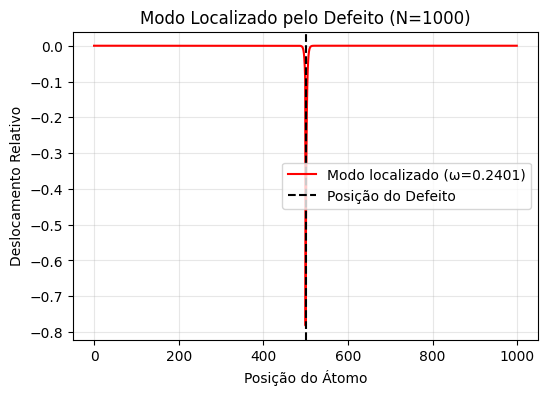


Analisando cadeia com N = 10000
Tempo cálculo homogêneo: 207.46 s
Tempo cálculo com defeito: 225.46 s


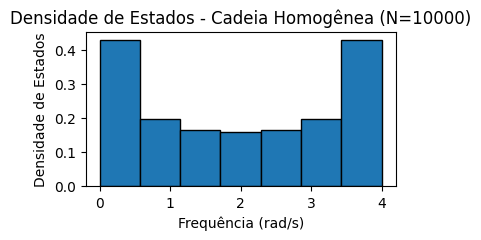

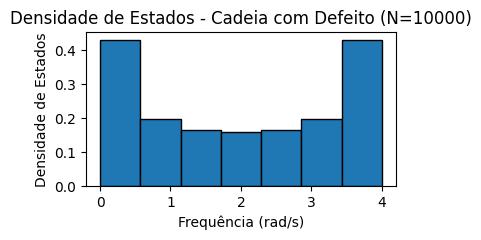

<Figure size 600x400 with 0 Axes>

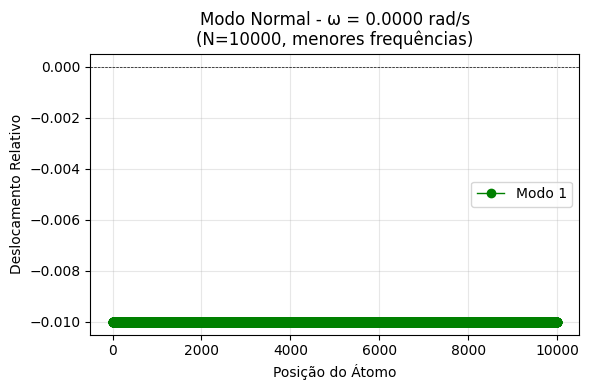

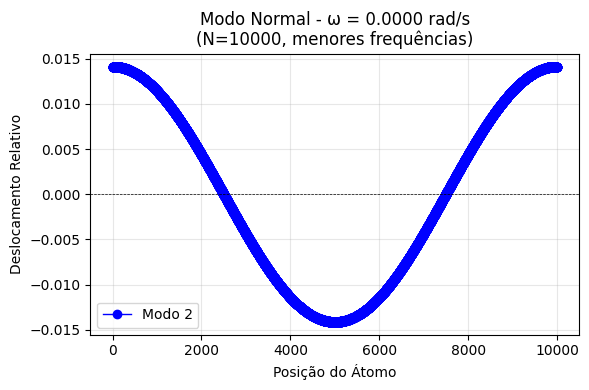

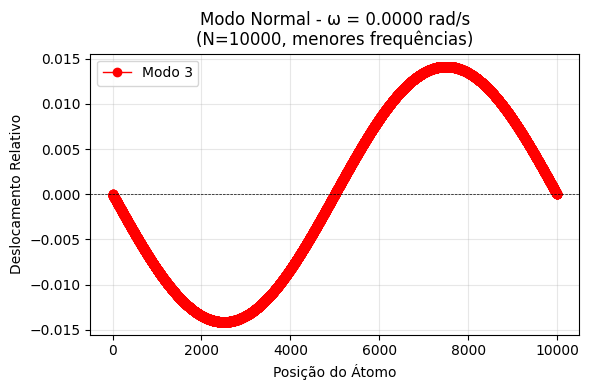

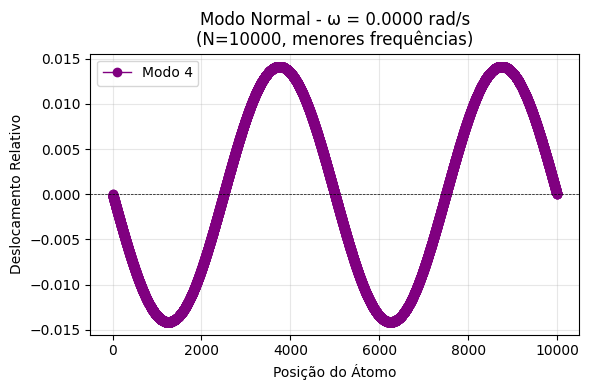

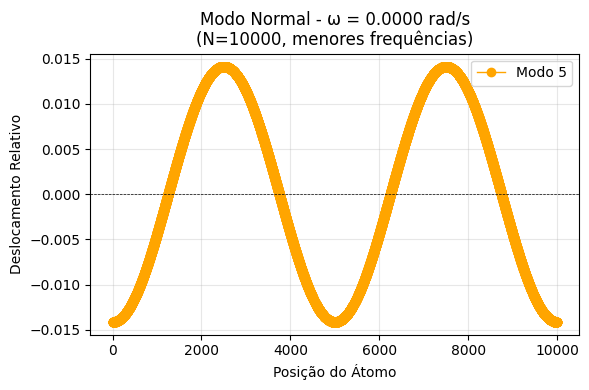

<Figure size 600x400 with 0 Axes>

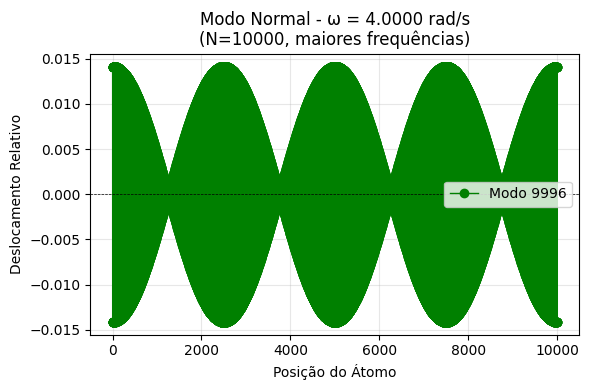

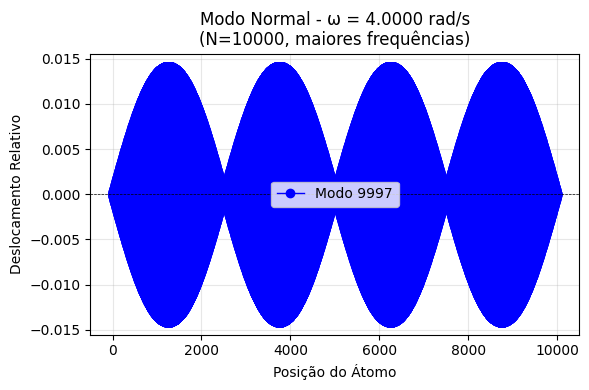

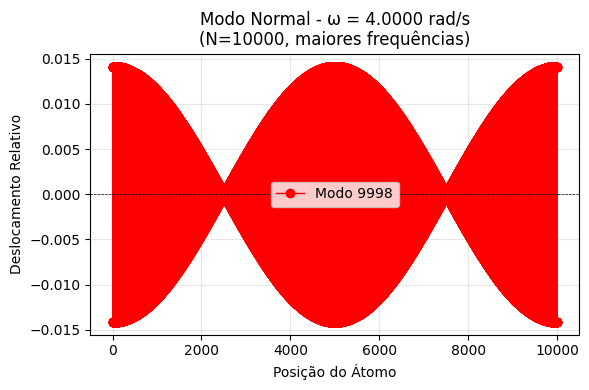

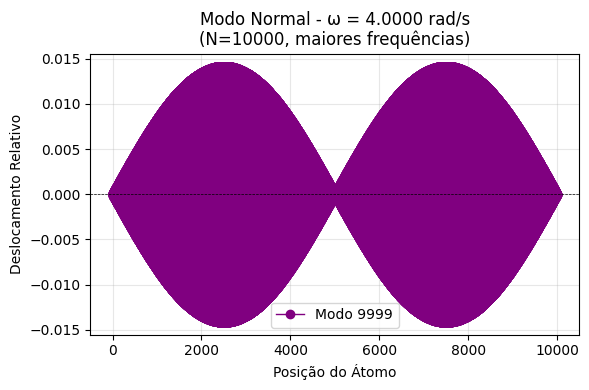

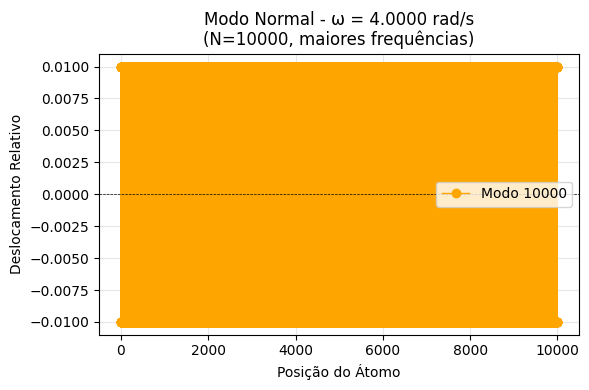

<Figure size 600x400 with 0 Axes>

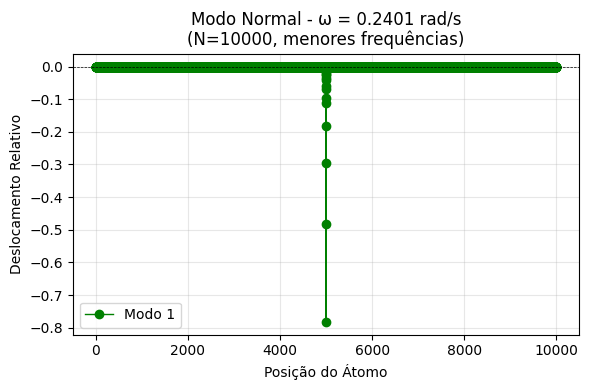

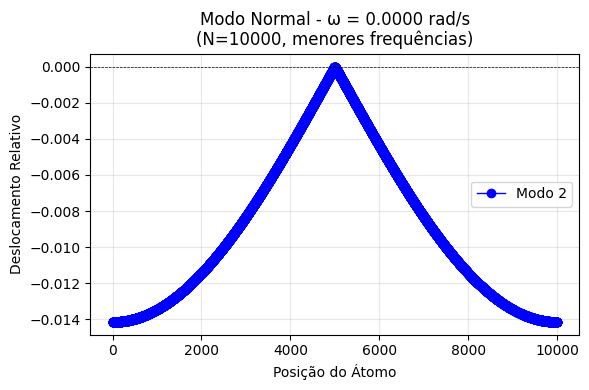

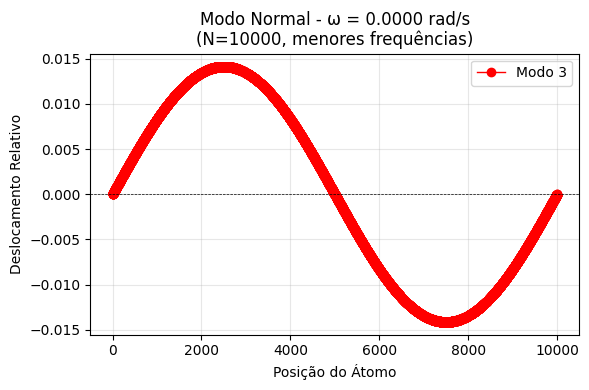

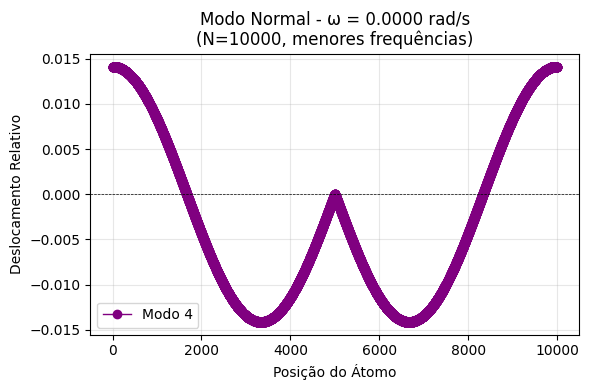

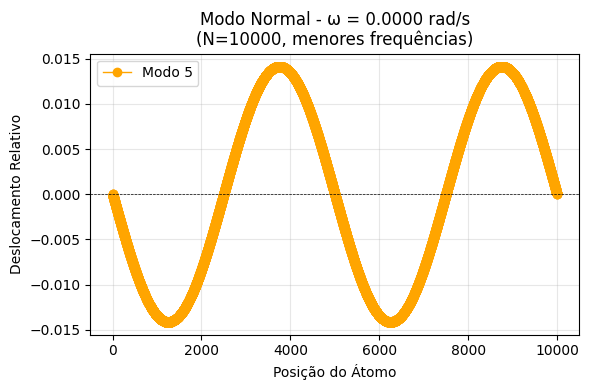

<Figure size 600x400 with 0 Axes>

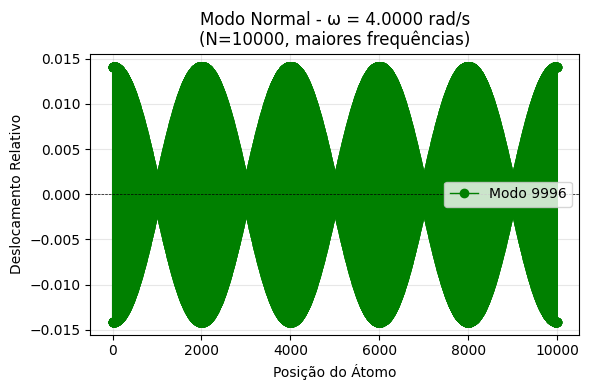

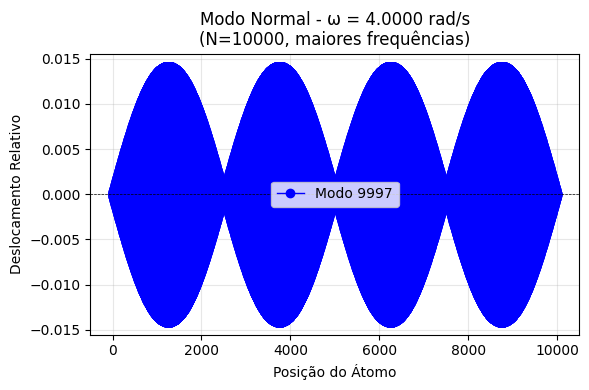

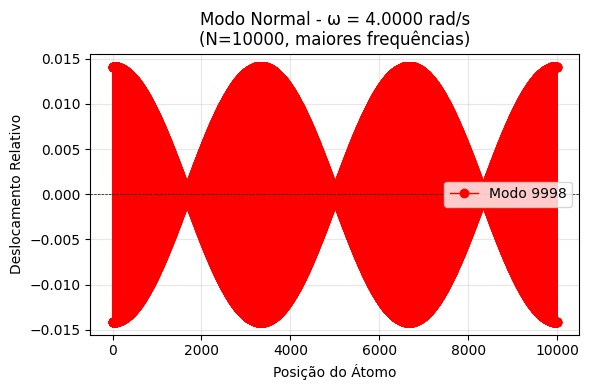

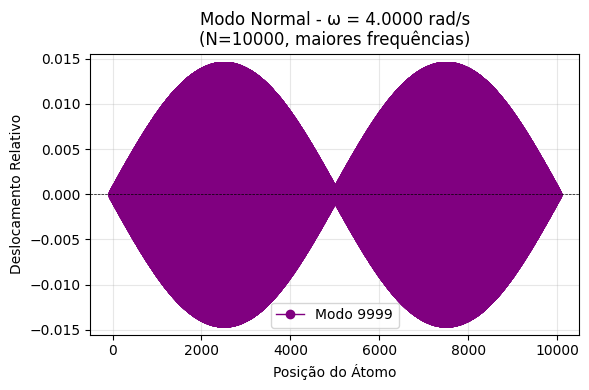

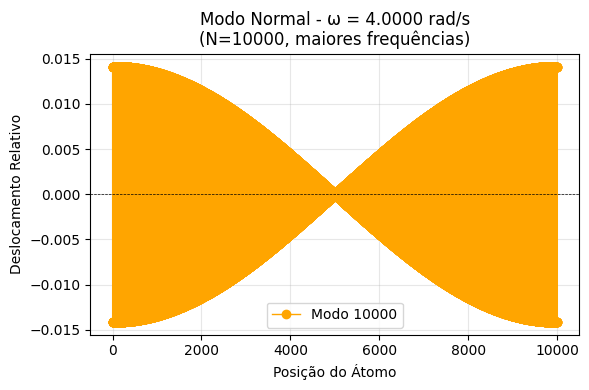

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import time

def build_dynamic_matrix(N, k=1, m=1, defect_pos=None, defect_mass=5):
    """
    Parâmetros:
        N (int): Número de átomos na cadeia
        k (float): Constante elástica das molas (N/m)
        m (float): Massa padrão dos átomos (kg)
        defect_pos (int or None): Posição do defeito (None para cadeia homogênea)
        defect_mass (float): Massa do átomo com defeito (kg)
    Retorna:
        D (ndarray): Matriz dinâmica do sistema
    """
    D = np.zeros((N, N))
    
    for i in range(N):
        # Determina se o átomo atual é o defeito
        is_defect = (i == defect_pos)
        mass_i = defect_mass if is_defect else m
        
        # Diagonal principal
        D[i,i] = 2*k / mass_i
        
        # Vizinhos com condições de contorno periódicas
        left = (i-1) % N
        right = (i+1) % N
        
        # Elementos fora da diagonal - todos divididos pela massa do átomo central
        D[i,left] = -k / mass_i
        D[i,right] = -k / mass_i
    
    return D

def calculate_frequencies(D):
    """
    Calcula as frequências angulares a partir da matriz dinâmica.
    
    Parâmetros:
        D (ndarray): Matriz dinâmica do sistema
    
    Retorna:
        frequencies (ndarray): Frequências angulares (rad/s) ordenadas
        modes (ndarray): Modos normais correspondentes (colunas)
    """
    eigenvalues, modes = eigh(D)
    frequencies = np.sqrt(np.abs(eigenvalues))  # Frequências angulares
    frequencies_ii = frequencies**2
    return frequencies_ii, modes

def plot_density_of_states(frequencies_ii, title, bins=7):
    """
    Plota a densidade de estados (histograma das frequências).
    
    Parâmetros:
        frequencies (ndarray): Array de frequências
        title (str): Título do gráfico
        bins (int): Número de bins para o histograma
    """
    plt.figure(figsize=(4, 2))
    plt.hist(frequencies_ii, bins=bins, density=True, edgecolor='black')
    plt.title(title)
    plt.xlabel('Frequência (rad/s)')
    plt.ylabel('Densidade de Estados')
    plt.show()

def plot_normal_modes(modes, frequencies, N, num_modes=5, low_freq=True):
    """
    Plota os modos normais de vibração.
    Parâmetros:
        modes (ndarray): Matriz de modos normais (autovetores)
        frequencies (ndarray): Frequências correspondentes
        N (int): Tamanho da cadeia
        num_modes (int): Número de modos a plotar
        low_freq (bool): Se True, plota modos de baixa frequência; caso contrário, alta frequência
    """
    plt.figure(figsize=(6, 4))
    
    if low_freq:
        selected_modes = range(num_modes)
        title_part = "menores"
    else:
        selected_modes = range(-num_modes, 0)
        title_part = "maiores"
    
    for i in selected_modes:
        plt.figure(figsize=(6, 4))
        mode = modes[:, i]
        freq = frequencies[i]
        color = ['green', 'blue', 'red', 'purple', 'orange'][i % 5]  # Cores cíclicas

        plt.plot(range(N), mode, color, marker='o', linewidth=1, label=f'Modo {i+1 if low_freq else len(frequencies)+i+1}')
        plt.title(f'Modo Normal - ω = {freq:.4f} rad/s\n(N={N}, {title_part} frequências)')
        plt.xlabel('Posição do Átomo')
        plt.ylabel('Deslocamento Relativo')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
        
        plt.tight_layout()
        plt.show()

def analyze_chain(N_values, k=1, m=1):
    """
    Analisa as cadeias para diferentes tamanhos.
    
    Parâmetros:
        N_values (list): Lista de tamanhos de cadeia a analisar
        k (float): Constante elástica
        m (float): Massa padrão
    """
    for N in N_values:
        print(f"\nAnalisando cadeia com N = {N}")
        
        # Posição do defeito (centro da cadeia)
        defect_pos = N // 2 if N > 10 else 1  # Para cadeias pequenas, coloca em posição 1
        
        # Caso 1: Cadeia homogênea
        start_time = time.time()
        D_hom = build_dynamic_matrix(N, k, m)
        freq_hom, modes_hom = calculate_frequencies(D_hom)
        print(f"Tempo cálculo homogêneo: {time.time() - start_time:.2f} s")
        
        # Caso 2: Cadeia com defeito
        start_time = time.time()
        D_def = build_dynamic_matrix(N, k, m, defect_pos=defect_pos, defect_mass=5*m)
        freq_def, modes_def = calculate_frequencies(D_def)
        print(f"Tempo cálculo com defeito: {time.time() - start_time:.2f} s")
        
        # Plot densidade de estados
        plot_density_of_states(freq_hom, f'Densidade de Estados - Cadeia Homogênea (N={N})')
        plot_density_of_states(freq_def, f'Densidade de Estados - Cadeia com Defeito (N={N})')
        
        # Plot modos normais para cadeia homogênea
        plot_normal_modes(modes_hom, freq_hom, N, low_freq=True)
        plot_normal_modes(modes_hom, freq_hom, N, low_freq=False)
        
        # Plot modos normais para cadeia com defeito
        plot_normal_modes(modes_def, freq_def, N, low_freq=True)
        plot_normal_modes(modes_def, freq_def, N, low_freq=False)
        
        # Plot comparativo dos modos localizados
        if N == 100:  # Fazemos apenas para N=100 para exemplificar
            plt.figure(figsize=(6, 4))
            # Encontra o modo mais localizado (maior amplitude no defeito)
            defect_mode_idx = np.argmax(np.abs(modes_def[defect_pos, :]))
            defect_mode = modes_def[:, defect_mode_idx]
            defect_freq = freq_def[defect_mode_idx]
            
            plt.plot(range(N), defect_mode, 'r-', label=f'Modo localizado (ω={defect_freq:.4f})')
            plt.axvline(x=defect_pos, color='k', linestyle='--', label='Posição do Defeito')
            plt.title(f'Modo Localizado pelo Defeito (N={N})')
            plt.xlabel('Posição do Átomo')
            plt.ylabel('Deslocamento Relativo')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.show()
        
        elif N == 1000:  # Fazemos apenas para N=1000 para exemplificar
            plt.figure(figsize=(6, 4))
            # Encontra o modo mais localizado (maior amplitude no defeito)
            defect_mode_idx = np.argmax(np.abs(modes_def[defect_pos, :]))
            defect_mode = modes_def[:, defect_mode_idx]
            defect_freq = freq_def[defect_mode_idx]
            
            plt.plot(range(N), defect_mode, 'r-', label=f'Modo localizado (ω={defect_freq:.4f})')
            plt.axvline(x=defect_pos, color='k', linestyle='--', label='Posição do Defeito')
            plt.title(f'Modo Localizado pelo Defeito (N={N})')
            plt.xlabel('Posição do Átomo')
            plt.ylabel('Deslocamento Relativo')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.show()
        

# Parâmetros do problema
N_values = [100, 1000, 10000]
k = 1  # N/m
m = 1  # kg

# Executa a análise
analyze_chain(N_values, k, m)

#Plotar ao menos as primeiras e últimas 5 frequências 
#histogramas - com menos bin
#colocar os pontos e plotar para cada frequencia